# **Load data**

In [241]:
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)

Mounted at /content/gdrive/


In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


In [3]:
pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 14.9 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=6c38e8e368fcc2f7f282b307ff6e10944fb0b26b12b822cd0a812135a3bfc40b
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [4]:
!ls "/content/gdrive/My Drive/ClassificationLung"

clinical_data.csv  survival°prediction_clinical_data.ipynb
CT_image	   survival_prediction_image_CT_3d_volume.ipynb
grouth_data.csv


# **Data preprocessing**

In [225]:
clinical_data=pd.read_csv("/content/gdrive/My Drive/ClassificationLung/clinical_data.csv", index_col='patient_id')
clinical_train = clinical_data[0:300]

In [6]:
grouth_train=pd.read_csv("/content/gdrive/My Drive/ClassificationLung/grouth_data.csv")
grouth_train.head(10)

,survival_time_months,event
0,16.666667,1
1,3.500000,1
2,11.166667,1
3,2.266667,1
4,2.266667,1
5,57.100000,0
6,31.400000,0
7,36.166667,1
8,37.433333,0
9,32.966667,0


Gender

In [226]:
clinical_train.gender.value_counts(sort=False, dropna=False)

MALE      194
FEMALE    106
Name: gender, dtype: int64

In [227]:
clinical_train['gender']=clinical_train.gender.apply(lambda x: 1 if x == 'MALE'
                                                                              else 2
                                                                              )
clinical_train.gender.value_counts(sort=False, dropna=False)

<ipython-input-227-b42e9077a081>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinical_train['gender']=clinical_train.gender.apply(lambda x: 1 if x == 'MALE'


1    194
2    106
Name: gender, dtype: int64

clinical_category

In [228]:
clinical_train.clinical_category.value_counts(sort=False, dropna=False)

NaN     79
cT4     71
cT2a    22
cTX     10
cT1b    19
cT2b    10
cT1a    10
cT3     47
cT1c    16
cT2     10
cT1      6
Name: clinical_category, dtype: int64

In [229]:
clinical_train['clinical_category']=clinical_train.clinical_category.apply(lambda x: 0 if x == 'cT1'
                                                                              else 1 if x =='cT2'
                                                                              else 2 if x =='cT1c'
                                                                              else 3 if x =='cT3'
                                                                              else 4 if x == 'cT1a'
                                                                              else 5 if x == 'cT2b'
                                                                              else 6 if x == 'cT1b'
                                                                              else 7 if x == 'cTX'
                                                                              else 8 if x == 'cT2a'
                                                                              else 9 if x == 'cT4'
                                                                              else 10)
clinical_train.clinical_category.value_counts(sort=False, dropna=False)

<ipython-input-229-3a94d24cbed7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinical_train['clinical_category']=clinical_train.clinical_category.apply(lambda x: 0 if x == 'cT1'


10    79
9     71
8     22
7     10
6     19
5     10
4     10
3     47
2     16
1     10
0      6
Name: clinical_category, dtype: int64

In [230]:
clinical_train.head()

,age,clinical_category,gender,metastasis_category,regional_nodes_category,smoking_status,survival_time_months,event
patient_id,,,,,,,,
case_0093,71,10,1,NaN,NaN,Ex-smoker,16.666667,1
case_0094,70,9,1,cM1c,cN3,Ex-smoker,3.500000,1
case_0095,59,8,1,cM1c,cN0,Smoker,11.166667,1
case_0096,69,10,1,NaN,NaN,Ex-smoker,2.266667,1
case_0097,60,9,2,cM0,cN3,Non-smoker,2.266667,1


In [231]:
clinical_train.shape


(300, 8)

Metastasis_category

In [232]:
clinical_train.metastasis_category.value_counts(sort=False, dropna=False)

NaN      55
cM1c     43
cM0     124
cM1b     25
cM1a     11
cM1      42
Name: metastasis_category, dtype: int64

In [233]:
clinical_train['metastasis_category']=clinical_train.metastasis_category.apply(lambda x: 0 if x == 'cM1'
                                                                              else 1 if x =='cM1a'
                                                                              else 2 if x =='cM1b'
                                                                              else 3 if x =='cM0'
                                                                              else 4 if x == 'cM1c'
                                                                              else 5)
clinical_train.metastasis_category.value_counts(sort=False, dropna=False)

<ipython-input-233-9e76040b72af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinical_train['metastasis_category']=clinical_train.metastasis_category.apply(lambda x: 0 if x == 'cM1'


5     55
4     43
3    124
2     25
1     11
0     42
Name: metastasis_category, dtype: int64

regional_nodes_category

In [234]:
clinical_train.regional_nodes_category.value_counts(sort=False, dropna=False)

NaN    79
cN3    61
cN0    72
cNX    10
cN2    57
cN1    21
Name: regional_nodes_category, dtype: int64

In [235]:
clinical_train['regional_nodes_category']=clinical_train.regional_nodes_category.apply(lambda x: 0 if x == 'cN1'
                                                                              else 1 if x =='cN2'
                                                                              else 2 if x =='cNX'
                                                                              else 3 if x =='cN0'
                                                                              else 4 if x == 'cN3'
                                                                              else 5)
clinical_train.regional_nodes_category.value_counts(sort=False, dropna=False)

<ipython-input-235-dd1eb267b9a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinical_train['regional_nodes_category']=clinical_train.regional_nodes_category.apply(lambda x: 0 if x == 'cN1'


5    79
4    61
3    72
2    10
1    57
0    21
Name: regional_nodes_category, dtype: int64

Smoking_status

In [236]:
clinical_train.smoking_status.value_counts(sort=False, dropna=False)

Ex-smoker      97
Smoker        125
Non-smoker     44
Unknown        34
Name: smoking_status, dtype: int64

In [237]:
clinical_train['smoking_status']=clinical_train.smoking_status.apply(lambda x: 0 if x == 'Non-smoker'
                                                                              else 1 if x =='Smoker'
                                                                              else 2 if x =='Ex-smoker'
                                                                              else 3 )
clinical_train.smoking_status.value_counts(sort=False, dropna=False)

<ipython-input-237-d751e37a6bd9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinical_train['smoking_status']=clinical_train.smoking_status.apply(lambda x: 0 if x == 'Non-smoker'


2     97
1    125
0     44
3     34
Name: smoking_status, dtype: int64

In [238]:
clinical_train.head()

,age,clinical_category,gender,metastasis_category,regional_nodes_category,smoking_status,survival_time_months,event
patient_id,,,,,,,,
case_0093,71,10,1,5,5,2,16.666667,1
case_0094,70,9,1,4,4,2,3.500000,1
case_0095,59,8,1,4,3,1,11.166667,1
case_0096,69,10,1,5,5,2,2.266667,1
case_0097,60,9,2,3,4,0,2.266667,1


In [19]:
clinical_train.head(10)

,age,clinical_category,gender,metastasis_category,regional_nodes_category,smoking_status,survival_time_months,event
patient_id,,,,,,,,
case_0093,71,10,1,5,5,2,16.666667,1
case_0094,70,9,1,4,4,2,3.500000,1
case_0095,59,8,1,4,3,1,11.166667,1
case_0096,69,10,1,5,5,2,2.266667,1
case_0097,60,9,2,3,4,0,2.266667,1
case_0098,67,10,1,5,5,2,57.100000,0
case_0099,65,9,1,2,3,2,31.400000,0
case_0100,73,7,2,3,2,2,36.166667,1
case_0101,67,6,1,3,4,0,37.433333,0


# **Feature selection**

In [20]:
clinical_train.head()

,age,clinical_category,gender,metastasis_category,regional_nodes_category,smoking_status,survival_time_months,event
patient_id,,,,,,,,
case_0093,71,10,1,5,5,2,16.666667,1
case_0094,70,9,1,4,4,2,3.500000,1
case_0095,59,8,1,4,3,1,11.166667,1
case_0096,69,10,1,5,5,2,2.266667,1
case_0097,60,9,2,3,4,0,2.266667,1


In [21]:
x_train = clinical_train[0:300]

# clinical_category_selection


In [129]:
x_train_clinical_ca = x_train[['clinical_category','survival_time_months','event']]

In [130]:
dummies_clinical = pd.get_dummies(x_train_clinical_ca["clinical_category"], prefix = 'clinical_category')
#dummies_clinical.head(4)

In [131]:
dummies_clinical = dummies_clinical[["clinical_category_9"]]
x_train_clinical_ca = pd.concat([x_train_clinical_ca, dummies_clinical], axis = 1)
x_train_clinical_ca = x_train_clinical_ca.drop("clinical_category", axis = 1)
x_train_clinical_ca.head()

,survival_time_months,event,clinical_category_9
patient_id,,,
case_0093,16.666667,1,0
case_0094,3.500000,1,1
case_0095,11.166667,1,0
case_0096,2.266667,1,0
case_0097,2.266667,1,1


In [132]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(x_train_clinical_ca, duration_col='survival_time_months', event_col='event')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 300 total observations, 179 right-censored observations>
             duration col = 'survival_time_months'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 300
number of events observed = 121
   partial log-likelihood = -604.90
         time fit was run = 2024-01-12 10:42:37 UTC

---
                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                   
clinical_category_9   1.01       2.74       0.19             0.63             1.38                 1.88                 3.98

                      cmp to    z      p   -log2(p)
covariate                                          
clinical_category_9     0.00 5.26 <0.005      22.77
---
Concordance = 0.62
Partial AIC = 1211.80
log-likelihood ratio test = 24.88 on 1 df
-log2(p) of ll-ratio test = 20.65

# metastasis_category fequtre selection

In [137]:
x_train_metastasis_category = x_train[['metastasis_category','survival_time_months','event']]

In [138]:
dummies_metastasis = pd.get_dummies(x_train_metastasis_category["metastasis_category"], prefix = 'metastasis_category')
#dummies_metastasis.head(4)

In [139]:
dummies_metastasis = dummies_metastasis[["metastasis_category_2","metastasis_category_4"]]
x_train_metastasis_category = pd.concat([x_train_metastasis_category, dummies_metastasis], axis = 1)
x_train_metastasis_category = x_train_metastasis_category.drop("metastasis_category", axis = 1)
x_train_metastasis_category.head()

,survival_time_months,event,metastasis_category_2,metastasis_category_4
patient_id,,,,
case_0093,16.666667,1,0,0
case_0094,3.500000,1,0,1
case_0095,11.166667,1,0,1
case_0096,2.266667,1,0,0
case_0097,2.266667,1,0,0


In [140]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(x_train_metastasis_category, duration_col='survival_time_months', event_col='event')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 300 total observations, 179 right-censored observations>
             duration col = 'survival_time_months'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 300
number of events observed = 121
   partial log-likelihood = -590.27
         time fit was run = 2024-01-12 10:43:45 UTC

---
                        coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                     
metastasis_category_2   1.51       4.52       0.25             1.02             2.00                 2.76                 7.39
metastasis_category_4   1.47       4.34       0.22             1.03             1.91                 2.80                 6.74

                        cmp to    z      p   -log2(p)
covariate                                            
metastasis_category_2     0.00 6.00 <0.005      28.94
metastasis_category_4     0.00 6.54 <0.005      33.95
---
Concordance = 0.66
Partial AIC = 1184.53
log-likelihood ratio test = 54.15 on 2 df
-log2(p) of ll-ratio test = 39.06

# regional_nodes_category selection

In [146]:
x_train_regional_nodes_category = x_train[['regional_nodes_category','survival_time_months','event']]

In [147]:
dummies_regional_nodes = pd.get_dummies(x_train_regional_nodes_category["regional_nodes_category"], prefix = 'regional_nodes_category')
#dummies_regional_nodes.head(4)

In [148]:
dummies_regional_nodes = dummies_regional_nodes[["regional_nodes_category_4"]]
x_train_regional_nodes_category = pd.concat([x_train_regional_nodes_category, dummies_regional_nodes], axis = 1)
x_train_regional_nodes_category = x_train_regional_nodes_category.drop("regional_nodes_category", axis = 1)
x_train_regional_nodes_category.head()

,survival_time_months,event,regional_nodes_category_4
patient_id,,,
case_0093,16.666667,1,0
case_0094,3.500000,1,1
case_0095,11.166667,1,0
case_0096,2.266667,1,0
case_0097,2.266667,1,1


In [149]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(x_train_regional_nodes_category, duration_col='survival_time_months', event_col='event')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 300 total observations, 179 right-censored observations>
             duration col = 'survival_time_months'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 300
number of events observed = 121
   partial log-likelihood = -601.75
         time fit was run = 2024-01-12 10:44:55 UTC

---
                            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                         
regional_nodes_category_4   1.18       3.25       0.20             0.79             1.56                 2.21                 4.76

                            cmp to    z      p   -log2(p)
covariate                                                
regional_nodes_category_4     0.00 6.02 <0.005      29.11
---
Concordance = 0.63
Partial AIC = 1205.51
log-likelihood ratio test = 31.17 on 1 df
-log2(p) of ll-ratio test = 25.34

# smoking_status selection

In [122]:
x_train_smoking_status = x_train[['smoking_status','survival_time_months','event']]

In [123]:
dummies_smoking_status = pd.get_dummies(x_train_smoking_status["smoking_status"], prefix = 'smoking_status')
dummies_smoking_status.head(4)

,smoking_status_0,smoking_status_1,smoking_status_2,smoking_status_3
patient_id,,,,
case_0093,0,0,1,0
case_0094,0,0,1,0
case_0095,0,1,0,0
case_0096,0,0,1,0


In [124]:
dummies_smoking_status = dummies_smoking_status[["smoking_status_3"]]
x_train_smoking_status = pd.concat([x_train_smoking_status, dummies_smoking_status], axis = 1)
x_train_smoking_status = x_train_smoking_status.drop("smoking_status", axis = 1)
x_train_smoking_status .head()

,survival_time_months,event,smoking_status_3
patient_id,,,
case_0093,16.666667,1,0
case_0094,3.500000,1,0
case_0095,11.166667,1,0
case_0096,2.266667,1,0
case_0097,2.266667,1,0


In [121]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(x_train_smoking_status, duration_col='survival_time_months', event_col='event')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 300 total observations, 179 right-censored observations>
             duration col = 'survival_time_months'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 300
number of events observed = 121
   partial log-likelihood = -610.55
         time fit was run = 2024-01-12 10:34:02 UTC

---
                   coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                
smoking_status_3  -1.63       0.20       0.59            -2.78            -0.48                 0.06                 0.62

                   cmp to     z    p   -log2(p)
covariate                                      
smoking_status_3     0.00 -2.79 0.01       7.55
---
Concordance = 0.55
Partial AIC = 1223.11
log-likelihood ratio test = 13.57 on 1 df
-log2(p) of ll-ratio test = 12.09

In [ ]:
import pandas as pd
from lifelines.statistics import multivariate_logrank_test
results = multivariate_logrank_test(clinical_train['survival_time_months'], clinical_train['smoking_status'], clinical_train['event'])
results.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 3
         test_name = multivariate_logrank_test

---
 test_statistic    p  -log2(p)
          12.26 0.01      7.26

# **train a model**

In [158]:
x_train_clinical_ca.head()

x_train_metastasis_category.head()
x_train_metastasis_category= x_train_metastasis_category.drop("survival_time_months", axis = 1)
x_train_metastasis_category= x_train_metastasis_category.drop("event", axis = 1)

x_train_regional_nodes_category.head()
x_train_regional_nodes_category= x_train_regional_nodes_category.drop("survival_time_months", axis = 1)
x_train_regional_nodes_category= x_train_regional_nodes_category.drop("event", axis = 1)

In [160]:
x_train_final = pd.concat([x_train_clinical_ca, x_train_metastasis_category,x_train_regional_nodes_category], axis = 1)

In [161]:
x_train_final.head()

,survival_time_months,event,clinical_category_9,metastasis_category_2,metastasis_category_4,regional_nodes_category_4
patient_id,,,,,,
case_0093,16.666667,1,0,0,0,0
case_0094,3.500000,1,1,0,1,1
case_0095,11.166667,1,0,0,1,0
case_0096,2.266667,1,0,0,0,0
case_0097,2.266667,1,1,0,0,1


In [199]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
breslow = cph.fit(x_train_final, duration_col='survival_time_months', event_col='event')
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 300 total observations, 179 right-censored observations>
             duration col = 'survival_time_months'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 300
number of events observed = 121
   partial log-likelihood = -582.42
         time fit was run = 2024-01-12 11:11:48 UTC

---
                            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                         
clinical_category_9         0.48       1.62       0.21             0.07             0.90                 1.07                 2.46
metastasis_category_2       1.14       3.11       0.27             0.61             1.67                 1.83                 5.29
metastasis_category_4       1.14       3.14       0.24             0.67             1.62                 1.95                 5.03
regional_nodes_category_4   0.58       1.78       0.22             0.14             1.01                 1.15                 2.75

                            cmp to    z      p   -log2(p)
covariate                                                
clinical_category_9           0.00 2.27   0.02       5.44
metastasis_category_2         0.00 4.19 <0.005      15.16
metastasis_category_4         0.00 4.74 <0.005      18.82
regional_nodes_category_4     0.00 2.61   0.01       6.79
---
Concordance = 0.71
Partial AIC = 1172.85
log-likelihood ratio test = 69.83 on 4 df
-log2(p) of ll-ratio test = 45.21

In [200]:
from lifelines.utils import concordance_index
concordance=concordance_index(x_train['survival_time_months'], -cph.predict_partial_hazard(x_train_final), x_train['event'])
print(concordance)

0.7093632958801498


# Prediction

In [223]:
x_test = clinical_train[319:320]
x_test.head()

,age,clinical_category,gender,metastasis_category,regional_nodes_category,smoking_status,survival_time_months,event
patient_id,,,,,,,,
case_0412,58,2,1,3,3,1,24.633333,1


In [224]:
dum_test_clinical = pd.get_dummies(x_test["clinical_category"], prefix = 'clinical_category')
dum_test_clinical = dum_test_clinical[['clinical_category_9]]
x_test = pd.concat([x_test, dum_test_clinical], axis = 1)
x_test = x_test.drop("clinical_category", axis = 1)
x_test.head()


,clinical_category_2
patient_id,
case_0412,1


In [193]:
dum_test_metastasis = pd.get_dummies(x_test["metastasis_category"], prefix = 'metastasis_category')
dum_test_metastasis.head()
dum_test_metastasis= dum_test_metastasis[['metastasis_category_2','metastasis_category_4']]
x_test = pd.concat([x_test,dum_test_metastasis], axis = 1)
x_test = x_test.drop("metastasis_category", axis = 1)
x_test.head()

,age,gender,regional_nodes_category,smoking_status,survival_time_months,event,clinical_category_9,metastasis_category_2,metastasis_category_4
patient_id,,,,,,,,,
case_0394,83,2,5,2,6.900000,0,0,0,0
case_0395,81,1,1,2,6.566667,1,0,0,0
case_0396,66,2,0,2,20.466667,0,0,0,0
case_0397,63,2,1,1,0.566667,1,1,0,1
case_0398,70,2,0,3,50.600000,0,0,0,0


In [194]:
dum_test_regional_nodes_category= pd.get_dummies(x_test["regional_nodes_category"], prefix = 'regional_nodes_category')
dum_test_regional_nodes_category.head()
dum_test_regional_nodes_category= dum_test_regional_nodes_category[['regional_nodes_category_4']]
x_test = pd.concat([x_test,dum_test_regional_nodes_category], axis = 1)
x_test = x_test.drop("regional_nodes_category", axis = 1)
x_test.head()

,age,gender,smoking_status,survival_time_months,event,clinical_category_9,metastasis_category_2,metastasis_category_4,regional_nodes_category_4
patient_id,,,,,,,,,
case_0394,83,2,2,6.900000,0,0,0,0,0
case_0395,81,1,2,6.566667,1,0,0,0,0
case_0396,66,2,2,20.466667,0,0,0,0,0
case_0397,63,2,1,0.566667,1,1,0,1,0
case_0398,70,2,3,50.600000,0,0,0,0,0


In [195]:
x_test = x_test.drop("age", axis = 1)


In [196]:
x_test = x_test.drop("gender", axis = 1)

In [198]:
x_test = x_test.drop("smoking_status", axis = 1)
x_test.head()

,survival_time_months,event,clinical_category_9,metastasis_category_2,metastasis_category_4,regional_nodes_category_4
patient_id,,,,,,
case_0394,6.900000,0,0,0,0,0
case_0395,6.566667,1,0,0,0,0
case_0396,20.466667,0,0,0,0,0
case_0397,0.566667,1,1,0,1,0
case_0398,50.600000,0,0,0,0,0


In [204]:
x_test = x_test.drop("survival_time_months", axis = 1)
x_test = x_test.drop("event", axis = 1)
preds = breslow.predict_expectation(x_test)


In [210]:
y_test = grouth_train[301:320]

In [211]:
concordance_index(y_test['survival_time_months'], preds, y_test['event'])

0.7739130434782608

**Kaplan-Maier Curve Estimation (Non-Parametric)**
To start with survival analysis, the first step is to plot a survival curve of the overall data. It can be done by generating a Kaplan-Maier curve.

In [ ]:

T = x_train['survival_time_months']
E = x_train['event']

<Axes: xlabel='timeline'>

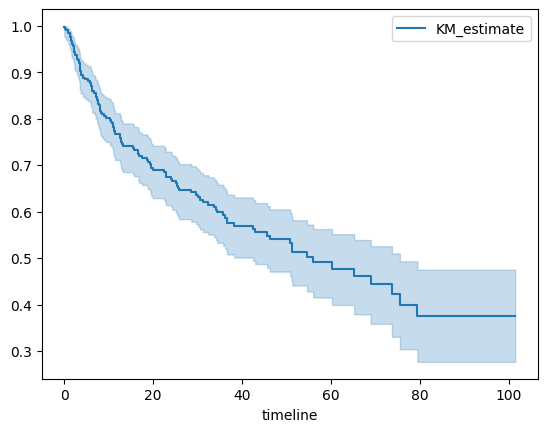

In [ ]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(durations = T, event_observed = E)
kmf.plot_survival_function()

Text(0.5, 1.0, 'Survival function')

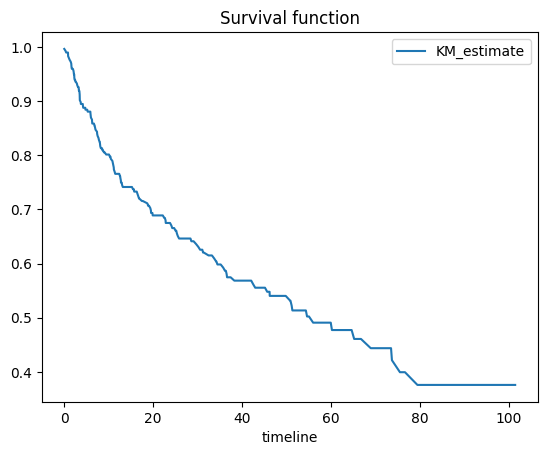

In [ ]:
kmf.survival_function_.plot()
plt.title('Survival function')

<Axes: xlabel='timeline'>

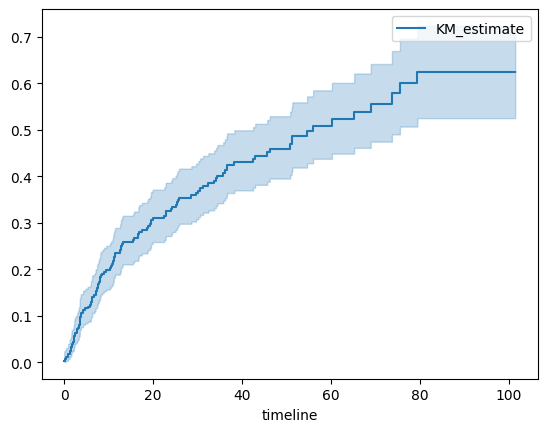

In [ ]:
kmf.plot_cumulative_density()

In [ ]:
from lifelines.utils import median_survival_times
median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)
print(median_)
print(median_confidence_interval_)

56.0
     KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                    42.5               75.533333


Model

In [ ]:
cph.fit(x_train, duration_col='survival_time_months', event_col='event')

<lifelines.CoxPHFitter: fitted with 300 total observations, 179 right-censored observations>

In [ ]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 300 total observations, 179 right-censored observations>
             duration col = 'survival_time_months'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 300
number of events observed = 121
   partial log-likelihood = -613.51
         time fit was run = 2024-01-11 17:02:49 UTC

---
                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                       
age                       0.01       1.01       0.01            -0.01             0.02                 0.99                 1.02
clinical_category         0.07       1.07       0.03            -0.00             0.13                 1.00                 1.14
metastasis_category       0.05       1.05       0.07            -0.09             0.19                 0.92                 1.21
regional_nodes_category  -0.09       0.92       0.06            -0.21             0.04                 0.81                 1.04
smoking_status           -0.18       0.84       0.11            -0.40             0.04                 0.67                 1.04

                          cmp to     z    p   -log2(p)
covariate                                             
age                         0.00  0.58 0.56       0.83
clinical_category           0.00  1.92 0.05       4.19
metastasis_category         0.00  0.72 0.47       1.09
regional_nodes_category     0.00 -1.33 0.18       2.44
smoking_status              0.00 -1.64 0.10       3.30
---
Concordance = 0.57
Partial AIC = 1237.01
log-likelihood ratio test = 7.67 on 5 df
-log2(p) of ll-ratio test = 2.51

In [ ]:
x_train=x_train.drop(columns=['metastasis_category'])
x_train=x_train.drop(columns=['regional_nodes_category'])
x_train=x_train.drop(columns=['smoking_status'])

In [ ]:
x_train.head()

,clinical_category,survival_time_months,event
patient_id,,,
case_0093,10,16.666667,1
case_0094,9,3.500000,1
case_0095,8,11.166667,1
case_0096,10,2.266667,1
case_0097,9,2.266667,1


In [ ]:
cph.fit(x_train, duration_col='survival_time_months', event_col='event')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 300 total observations, 179 right-censored observations>
             duration col = 'survival_time_months'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 300
number of events observed = 121
   partial log-likelihood = -616.08
         time fit was run = 2024-01-11 17:05:53 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
clinical_category   0.05       1.05       0.03            -0.01             0.11                 0.99                 1.11

                    cmp to    z    p   -log2(p)
covariate                                      
clinical_category     0.00 1.57 0.12       3.09
---
Concordance = 0.53
Partial AIC = 1234.17
log-likelihood ratio test = 2.51 on 1 df
-log2(p) of ll-ratio test = 3.15

In [ ]:
from lifelines.utils import concordance_index
concordance=concordance_index(x_train['survival_time_months'], -cph.predict_partial_hazard(x_train), x_train['event'])
print(concordance)

0.5729896452963208


In [ ]:
prediction_train_cph=cph.predict_survival_function(x_train)
prediction_train_cph

,case_0093,case_0094,case_0095,case_0096,case_0097,case_0098,case_0099,case_0100,case_0101,case_0102,...,case_0383,case_0384,case_0385,case_0386,case_0387,case_0388,case_0389,case_0390,case_0391,case_0392
0.000000,0.996513,0.996639,0.996141,0.996551,0.995673,0.996589,0.996786,0.996623,0.996305,0.996419,...,0.996589,0.997656,0.996117,0.996886,0.996367,0.996820,0.995710,0.996768,0.996675,0.995851
0.266667,0.993026,0.993278,0.992283,0.993102,0.991350,0.993178,0.993571,0.993245,0.992610,0.992837,...,0.993178,0.995308,0.992235,0.993771,0.992733,0.993640,0.991423,0.993534,0.993349,0.991704
0.433333,0.989543,0.989921,0.988431,0.989657,0.987036,0.989771,0.990359,0.989871,0.988921,0.989261,...,0.989771,0.992961,0.988360,0.990659,0.989105,0.990462,0.987145,0.990304,0.990026,0.987565
0.833333,0.989543,0.989921,0.988431,0.989657,0.987036,0.989771,0.990359,0.989871,0.988921,0.989261,...,0.989771,0.992961,0.988360,0.990659,0.989105,0.990462,0.987145,0.990304,0.990026,0.987565
0.866667,0.982577,0.983204,0.980731,0.982767,0.978418,0.982956,0.983932,0.983122,0.981545,0.982108,...,0.982956,0.988259,0.980613,0.984430,0.981850,0.984103,0.978599,0.983840,0.983379,0.979295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87.766667,0.346880,0.360478,0.309748,0.350956,0.268679,0.355034,0.376924,0.358670,0.325609,0.337061,...,0.355034,0.490936,0.307507,0.388586,0.331770,0.380883,0.271690,0.374806,0.364369,0.283570
90.133333,0.346880,0.360478,0.309748,0.350956,0.268679,0.355034,0.376924,0.358670,0.325609,0.337061,...,0.355034,0.490936,0.307507,0.388586,0.331770,0.380883,0.271690,0.374806,0.364369,0.283570
98.666667,0.346880,0.360478,0.309748,0.350956,0.268679,0.355034,0.376924,0.358670,0.325609,0.337061,...,0.355034,0.490936,0.307507,0.388586,0.331770,0.380883,0.271690,0.374806,0.364369,0.283570
98.733333,0.346880,0.360478,0.309748,0.350956,0.268679,0.355034,0.376924,0.358670,0.325609,0.337061,...,0.355034,0.490936,0.307507,0.388586,0.331770,0.380883,0.271690,0.374806,0.364369,0.283570


In [ ]:
concordance=concordance_index(x_train['survival_time_months'], -cph.predict_partial_hazard(x_train), x_train['event'])

In [ ]:
 -cph.predict_partial_hazard(x_train)

case_0093   -1.159403
case_0094   -1.105835
case_0095   -1.054742
case_0096   -1.159403
case_0097   -1.105835
               ...   
case_0388   -1.105835
case_0389   -1.159403
case_0390   -1.159403
case_0391   -0.959529
case_0392   -1.159403
Length: 300, dtype: float64

In [ ]:
x_val_model = x_val[['clinical_category']]
x_val_model.head()

,clinical_category
patient_id,
case_0394,10
case_0395,3
case_0396,5
case_0397,9
case_0398,3


In [ ]:
prediction_test_cph=cph.predict_expectation(x_val_model)


In [ ]:
print(y_val)

     survival_time_months  event
301              6.900000      0
302              6.566667      1
303             20.466667      0
304              0.566667      1
305             50.600000      0
306             41.800000      0
307              3.900000      1
308             12.600000      0
309             12.833333      1
310             11.466667      1
311              2.533333      1
312             38.533333      0
313             13.133333      1
314              1.300000      1
315             33.066667      1
316              2.933333      0
317             56.366667      0
318             24.500000      0
319             24.633333      1


In [ ]:
prediction_test_cph

case_0394    50.990249
case_0395    61.166196
case_0396    58.364244
case_0397    52.499839
case_0398    61.166196
case_0399    58.364244
case_0400    62.529271
case_0401    50.990249
case_0402    52.499839
case_0403    52.499839
case_0404    61.166196
case_0405    50.990249
case_0406    53.994084
case_0407    62.529271
case_0408    58.364244
case_0409    50.990249
case_0410    56.928176
case_0411    50.990249
case_0412    62.529271
dtype: float64

In [ ]:
concordance=concordance_index(x_train_model_final['SurvivalTime'], -cph.predict_partial_hazard(x_train_model_final), x_train_model_final['Event'])
print(concordance)